In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
longs = np.random.uniform(low=-90, high=90, size=1500)
latlongs = zip(lats, longs)
latlongs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(latlongs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7a3a7a841124b64d1e5471a766ab9dc


In [8]:
# Create an empty list to hold the weather data.
city_data= []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.  Sleep for 60 seconds.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | zalesovo
Processing Record 6 of Set 1 | mugumu
Processing Record 7 of Set 1 | antofagasta
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | guhagar
Processing Record 10 of Set 1 | port-gentil
Processing Record 11 of Set 1 | sohag
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | bridgetown
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 |

Processing Record 34 of Set 4 | brekstad
Processing Record 35 of Set 4 | plettenberg bay
Processing Record 36 of Set 4 | skagen
Processing Record 37 of Set 4 | cabinda
Processing Record 38 of Set 4 | el wasta
City not found. Skipping...
Processing Record 39 of Set 4 | soyo
Processing Record 40 of Set 4 | maarianhamina
Processing Record 41 of Set 4 | tartki
City not found. Skipping...
Processing Record 42 of Set 4 | salmas
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | tobol
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | napoleon
Processing Record 47 of Set 4 | chesma
Processing Record 48 of Set 4 | tiznit
Processing Record 49 of Set 4 | hukuntsi
Processing Record 50 of Set 4 | kharp
Processing Record 1 of Set 5 | imbituba
Processing Record 2 of Set 5 | acari
Processing Record 3 of Set 5 | sangin
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | ongandjera
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5

Processing Record 26 of Set 8 | gornopravdinsk
Processing Record 27 of Set 8 | kedougou
Processing Record 28 of Set 8 | krasnogorskoye
Processing Record 29 of Set 8 | farah
Processing Record 30 of Set 8 | aquiraz
Processing Record 31 of Set 8 | morwa
Processing Record 32 of Set 8 | columbus
Processing Record 33 of Set 8 | alexandria
Processing Record 34 of Set 8 | farafangana
Processing Record 35 of Set 8 | muzhi
Processing Record 36 of Set 8 | redditch
Processing Record 37 of Set 8 | tucupita
Processing Record 38 of Set 8 | gurgaon
Processing Record 39 of Set 8 | busayra
Processing Record 40 of Set 8 | puerto del rosario
Processing Record 41 of Set 8 | freiberg
Processing Record 42 of Set 8 | batticaloa
Processing Record 43 of Set 8 | la palma
Processing Record 44 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 45 of Set 8 | la suiza
Processing Record 46 of Set 8 | businga
Processing Record 47 of Set 8 | punta alta
Processing Record 48 of Set 8 | medvezhyegorsk
Proc

Processing Record 15 of Set 12 | bagan
Processing Record 16 of Set 12 | mecca
Processing Record 17 of Set 12 | chimoio
Processing Record 18 of Set 12 | miroslovesti
Processing Record 19 of Set 12 | maracas
Processing Record 20 of Set 12 | kamenka
Processing Record 21 of Set 12 | santiago
Processing Record 22 of Set 12 | scarborough
Processing Record 23 of Set 12 | bar-le-duc
Processing Record 24 of Set 12 | cangucu
Processing Record 25 of Set 12 | paracuru
Processing Record 26 of Set 12 | ginda
Processing Record 27 of Set 12 | trincomalee
Processing Record 28 of Set 12 | puerto suarez
Processing Record 29 of Set 12 | karaton
Processing Record 30 of Set 12 | tahoua
Processing Record 31 of Set 12 | damavand
Processing Record 32 of Set 12 | uravakonda
Processing Record 33 of Set 12 | kutiyana
Processing Record 34 of Set 12 | libreville
Processing Record 35 of Set 12 | lokoja
Processing Record 36 of Set 12 | raisen
Processing Record 37 of Set 12 | geraldton
Processing Record 38 of Set 12 |

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,78.53,49,0,6.91,US,2022-07-14 20:18:06
1,Victoria,22.2855,114.1577,85.32,83,89,4.00,HK,2022-07-14 20:19:04
2,Sorland,67.6670,12.6934,51.66,87,100,16.33,NO,2022-07-14 20:21:53
3,Ushuaia,-54.8000,-68.3000,33.42,80,0,2.30,AR,2022-07-14 20:17:11
4,Zalesovo,53.9939,84.7431,54.66,66,100,5.01,RU,2022-07-14 20:21:54
5,Mugumu,-1.8500,34.7000,68.13,50,91,1.95,TZ,2022-07-14 20:21:54
6,Antofagasta,-23.6500,-70.4000,60.08,70,44,5.93,CL,2022-07-14 20:21:54
7,Lasa,46.6166,10.7002,72.48,74,21,2.73,IT,2022-07-14 20:21:55
8,Guhagar,17.4842,73.1929,79.30,86,100,19.66,IN,2022-07-14 20:21:55
9,Port-Gentil,-0.7193,8.7815,75.16,83,40,8.05,GA,2022-07-14 20:21:55


In [12]:
newcolumnorder = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[newcolumnorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-14 20:18:06,42.0970,-79.2353,78.53,49,0,6.91
1,Victoria,HK,2022-07-14 20:19:04,22.2855,114.1577,85.32,83,89,4.00
2,Sorland,NO,2022-07-14 20:21:53,67.6670,12.6934,51.66,87,100,16.33
3,Ushuaia,AR,2022-07-14 20:17:11,-54.8000,-68.3000,33.42,80,0,2.30
4,Zalesovo,RU,2022-07-14 20:21:54,53.9939,84.7431,54.66,66,100,5.01
...,...,...,...,...,...,...,...,...,...
565,Tahta,EG,2022-07-14 20:26:29,26.7693,31.5021,86.76,21,0,13.49
566,Tinde,TZ,2022-07-14 20:26:29,-3.8833,33.2000,70.41,40,13,5.37
567,Paita,PE,2022-07-14 20:26:29,-5.0892,-81.1144,69.42,68,10,19.33
568,Namibe,AO,2022-07-14 20:26:30,-15.1961,12.1522,65.39,86,81,2.19


In [13]:
#Create the output file (CSV)
output_file = "weather_data/cities.csv"
#Export data to file
city_data_df.to_csv(output_file, index_label="City ID")

In [14]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

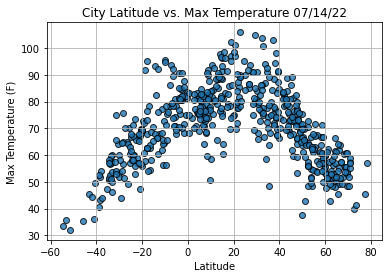

In [15]:
#Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure
plt.savefig("weather_data/Fig1.png")

#Show the plot.
plt.show()

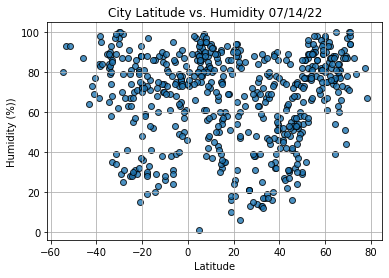

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure
plt.savefig("weather_data/Fig2.png")

#Show the plot.
plt.show()

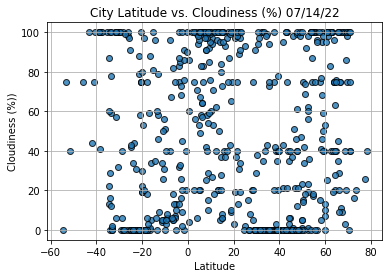

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure
plt.savefig("weather_data/Fig3.png")

#Show the plot.
plt.show()

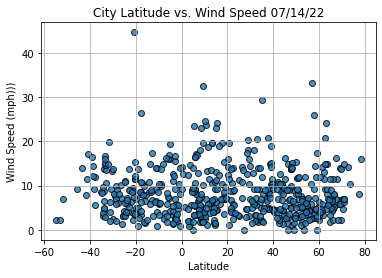

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)))")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure
plt.savefig("weather_data/Fig4.png")

#Show the plot.
plt.show()